In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)

In [57]:
df_sub = pd.read_csv('/Users/akarberkin/Downloads/nyserda_solar_installations_subsidized.csv')


<ipython-input-57-eaa33483e1df>:1: DtypeWarning: Columns (1,3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sub = pd.read_csv('/Users/akarberkin/Downloads/nyserda_solar_installations_subsidized.csv')


In [58]:
df_sub

,Reporting Period,Project Number,Legacy Project Number,Street Address,City,County,State,ZIP Code,Incorporated Municipality,Municipality Type,Census Tract,Sector,Program Type,Solicitation,Electric Utility,Purchase Type,Date Application Received,Date Completed,Project Status,Contractor,Minority or Women Owned Business Enterprise (MWBE),Primary Inverter Manufacturer,Primary Inverter Model Number,Total Inverter Quantity,Primary PV Module Manufacturer,PV Module Model Number,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Affordable Solar Residential Adder,Affordable Multifamily Housing Incentive,Community Adder,Inclusive Community Solar Adder,Expanded Solar For All Adder,Brownfield/Landfill Adder,Canopy Adder,Prevailing Wage Adder,Total Nameplate kW DC,Expected KWh Annual Production,Remote Net Metering,Community Distributed Generation,Green Jobs Green New York Participant,Latitude,Longitude,Georeference
0,07/31/2023,0000577626,NaN,NaN,AMAGANSETT,Suffolk,NY,11930,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Long Island Power Authority,Purchase,04/07/2023,NaN,Pipeline,NaN,No,NaN,NaN,0.0,NaN,NaN,0.0,0.00,6250.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,NaN,No,No,NaN,NaN,NaN
1,07/31/2023,0000540989,NaN,NaN,Aquebogue,Suffolk,NY,11931,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Long Island Power Authority,Purchase,05/13/2023,NaN,Pipeline,NaN,No,NaN,NaN,0.0,NaN,NaN,0.0,0.00,6250.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,NaN,No,No,NaN,NaN,NaN
2,07/31/2023,0000623055,NaN,NaN,Brooklyn,Kings,NY,11234,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Lease,07/22/2023,NaN,Pipeline,NaN,No,Delta Electronics,E6-TL-US [240V],1.0,Trina Solar,TSM-390DE09C.07,21.0,15935.00,1638.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,8.19,10408.0,NaN,No,No,NaN,NaN,NaN
3,07/31/2023,0000569864,NaN,NaN,East Amherst,Erie,NY,14051,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,National Grid,Purchase,05/06/2023,NaN,Pipeline,NaN,No,Enphase Energy Inc.,IQ8PLUS-72-2-US [240V],24.0,REC Solar,REC405AA Pure,24.0,30618.00,2916.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,9.72,11303.0,NaN,No,No,NaN,NaN,NaN
4,07/31/2023,0000604674,NaN,NaN,Elmont,Nassau,NY,11003,NaN,NaN,NaN,Residential,Residential/Small Commercial,PON 2112,Long Island Power Authority,Purchase,06/22/2023,NaN,Pipeline,NaN,No,NaN,NaN,0.0,NaN,NaN,0.0,0.00,6250.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.00,0.0,NaN,No,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153918,07/31/2023,0000024784,4884-37066,214 N Highland Ave,Ossining,Westchester,NY,10562,Ossining,Town,3.611901e+10,Non-Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Power Purchase Agreement,12/03/2013,06/13/2016,Complete,IPPsolar LLC (formerly Blueland LLC),No,Power-One,PVI-10.0-I-OUTD-x-US-208-y,3.0,Trina Solar,TSM-235PA05,154.0,145875.00,41849.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,36.39,43316.0,Yes,No,No,41.173234,-73.866223,POINT (-73.866222522 41.173233574)
153919,07/31/2023,0000460539,NaN,NaN,Flushing,Queens,NY,11358,New York,City,3.608111e+10,Residential,Residential/Small Commercial,PON 2112,Consolidated Edison,Purchase,05/04/2022,06/09/2022,Complete,Surf Clean Energy Inc,No,Enphase Energy Inc.,IQ7A-72-2-US [240V],10.0,Hanwha Q CELLS,Q.PEAK DUO L-G6.2 425,10.0,38215.00,3400.0,2550.0,0.0,0.0,0.0,0,0.0,0.0,0.0,4.25,5142.0,NaN,No,Yes,40.764230,-73.790627,POINT (-73.7906266 40.7642305)
153920,07/31/2023,0000068558,NaN,NaN,North Branch,Sullivan,NY,12766,Callicoon,Town,3.610595e+10,Residential,Residential/Small Commercial,PON 2112,NYS Electric and Gas,Purchase,09/21/2016,05/25/2017,Complete,Renewable Energy Solutions (dba for Black Cherry),No,Altenergy Power System,YC500I (240V),14.0,Silfab,SLA280M,28.0,29000.00,5536.0,2400.0,0.0,0.0,0.0,0,0.0,0.0,0.0,7.84,8937.0,NaN,No,No,41.835839,-74.924132,POINT (-74.9241319 41.8358392)
153921,07/

In [59]:
df_non_res = df_sub[df_sub['Sector'] ==  'Non-Residential']

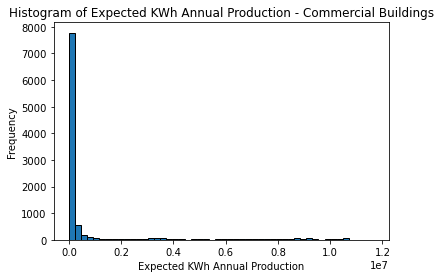

In [66]:
plt.hist(df_non_res['Expected KWh Annual Production'], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Expected KWh Annual Production')
plt.ylabel('Frequency')
plt.title(f'Histogram of Expected KWh Annual Production - Commercial Buildings')
plt.show()

In [6]:
len_original = len(df_sub)

In [61]:
df_sub = df_sub[df_sub['Sector'] ==  'Residential']
residential_rate = len(df_sub)/len_original
df_sub_fin = df_sub[['Census Tract' , 'Expected KWh Annual Production']]
df_sub_fin = df_sub_fin.dropna()
print(residential_rate, len(df_sub_fin)/len_original)

0.9359095131981575 0.8637825406209598


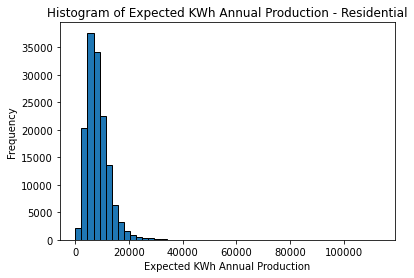

In [67]:
plt.hist(df_sub['Expected KWh Annual Production'], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Expected KWh Annual Production')
plt.ylabel('Frequency')
plt.title(f'Histogram of Expected KWh Annual Production - Residential')
plt.show()

In [8]:
len(df_sub_fin)

132956

In [9]:
df_sub_fin['Census Tract'] = df_sub_fin['Census Tract'].apply(lambda x: str(int(x)))

In [10]:
df = df_sub_fin.groupby('Census Tract')['Expected KWh Annual Production'].mean()
df

Census Tract
36001000100     3932.380952
36001000200     6327.360000
36001000300     6740.266667
36001000401     8007.416667
36001000403     5756.153846
                   ...     
36123150100    11312.769231
36123150200    12330.909091
36123150300    10495.368421
36123150400     9681.914894
36123150500    11591.062500
Name: Expected KWh Annual Production, Length: 4148, dtype: float64

In [11]:
import requests
import json

In [12]:
# Replace with your Census API key
API_KEY = "26fee3243d722f996f5a368bbbbc496b355cc295"

# Specify the base URL for the Census API
BASE_URL = "http://api.census.gov/data/2020/dec/dhc"

# Specify the parameters for your query
params = {
    "get": "P1_001N,H1_001N",
    "for": "tract:*",  
    "in": "state:36 + county:*",  
    "key": API_KEY,
}

# Make the API request
response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract and print the population data for each census tract
#     for row in data[1:]:  # Skip the header row
#         name, population, tract, state, county = row
#         print(f"Name: {name}, Population: {population}, Tract code: {state}{county}{tract}")
    df_census = pd.DataFrame(data[1:], columns=data[0])
    
    
else:
    print("Error: Unable to retrieve data")

In [13]:
df_census

,P1_001N,H1_001N,state,county,tract
0,2434,1164,36,023,970201
1,3254,1332,36,023,970202
2,3039,1406,36,023,970300
3,2812,1235,36,023,970400
4,3656,1780,36,023,970500
...,...,...,...,...,...
5406,5687,2943,36,081,071100
5407,5307,2772,36,081,071303
5408,6386,3250,36,081,071304
5409,5126,2554,36,081,071305


In [15]:
df_census['Census Tract'] = df_census['state'] + df_census['county'] + df_census['tract']

In [16]:
df_census = df_census[['P1_001N','H1_001N','Census Tract']]

In [17]:
merged_df = df_census.merge(df,left_on='Census Tract', right_on='Census Tract')

In [18]:
merged_df

,P1_001N,H1_001N,Census Tract,Expected KWh Annual Production
0,3039,1406,36023970300,6872.500000
1,2812,1235,36023970400,12424.875000
2,3656,1780,36023970500,6930.000000
3,3049,1752,36023970600,6841.000000
4,4000,1992,36023970700,6594.555556
...,...,...,...,...
3701,2426,993,36081070700,5285.090909
3702,2635,1124,36081070900,4825.250000
3703,5687,2943,36081071100,4062.285714
3704,5126,2554,36081071305,6318.000000


### Not matching census tracts from NYSERDA dataset and data from Census API

In [81]:
df_missing = df[~df.index.isin(merged_df['Census Tract'])]

In [82]:
df_missing = pd.DataFrame(df_missing)

In [84]:
df_missing['county'] = df_missing.index.to_series().apply(lambda x: x[2:5])

### non-matching Census Tracts by county code

In [86]:
df_missing.groupby(['county']).count()

,Expected KWh Annual Production
county,
001,10
003,3
005,10
007,2
009,2
011,5
013,1
015,3
017,4


In [20]:
merged_df['P1_001N'] = merged_df['P1_001N'].apply(lambda x: int(x))
merged_df['H1_001N'] = merged_df['H1_001N'].apply(lambda x: int(x))

In [21]:
merged_df = merged_df[merged_df['P1_001N'] != 0]

In [22]:
merged_df['KWh per capita'] = merged_df['Expected KWh Annual Production'] / merged_df['P1_001N']
merged_df['KWh per household'] = merged_df['Expected KWh Annual Production'] / merged_df['H1_001N']

<ipython-input-22-f7ce4397d1a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['KWh per capita'] = merged_df['Expected KWh Annual Production'] / merged_df['P1_001N']
<ipython-input-22-f7ce4397d1a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['KWh per household'] = merged_df['Expected KWh Annual Production'] / merged_df['H1_001N']


In [23]:
merged_df

,P1_001N,H1_001N,Census Tract,Expected KWh Annual Production,KWh per capita,KWh per household
0,3039,1406,36023970300,6872.500000,2.261435,4.887980
1,2812,1235,36023970400,12424.875000,4.418519,10.060628
2,3656,1780,36023970500,6930.000000,1.895514,3.893258
3,3049,1752,36023970600,6841.000000,2.243686,3.904680
4,4000,1992,36023970700,6594.555556,1.648639,3.310520
...,...,...,...,...,...,...
3701,2426,993,36081070700,5285.090909,2.178521,5.322347
3702,2635,1124,36081070900,4825.250000,1.831214,4.292927
3703,5687,2943,36081071100,4062.285714,0.714311,1.380321
3704,5126,2554,36081071305,6318.000000,1.232540,2.473767


In [24]:
merged_df[merged_df['Expected KWh Annual Production']>30000]

,P1_001N,H1_001N,Census Tract,Expected KWh Annual Production,KWh per capita,KWh per household
36,6519,3337,36061027300,49475.0,7.589354,14.826191
38,10422,5462,36061031704,36796.5,3.530656,6.736818


In [25]:
import geopandas as gpd
import pyogrio
import matplotlib.pyplot as plt

In [26]:
gdf = gpd.read_file('/Users/akarberkin/Downloads/tl_2018_36_tract/tl_2018_36_tract.shp')

gdf2 = gdf.merge(merged_df,left_on='GEOID', right_on='Census Tract')
gdf_total = gdf.merge(df_sub_fin,left_on='GEOID', right_on='Census Tract')

### Removed all values where Expected KWh Annual Production > 30000 (where the maximum is 97194), since it corresponds to 0.2% of the data, to see a clearer map

In [27]:
gdf_total = gdf_total[gdf_total['Expected KWh Annual Production'] < 30000]

In [28]:
gdf_total

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Census Tract,Expected KWh Annual Production
0,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,+42.0350532,-075.9055509,"POLYGON ((-75.95917 42.00852, -75.95914 42.008...",36007012702,27148.0
1,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,+42.0350532,-075.9055509,"POLYGON ((-75.95917 42.00852, -75.95914 42.008...",36007012702,2752.0
2,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,+42.0350532,-075.9055509,"POLYGON ((-75.95917 42.00852, -75.95914 42.008...",36007012702,17005.0
3,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,+42.0350532,-075.9055509,"POLYGON ((-75.95917 42.00852, -75.95914 42.008...",36007012702,8171.0
4,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,+42.0350532,-075.9055509,"POLYGON ((-75.95917 42.00852, -75.95914 42.008...",36007012702,9338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132951,36,119,014500,36119014500,145,Census Tract 145,G5020,S,2778952,14648,+41.2827060,-073.9087061,"POLYGON ((-73.92411 41.27396, -73.92388 41.274...",36119014500,8862.0
132952,36,119,014500,36119014500,145,Census Tract 145,G5020,S,2778952,14648,+41.2827060,-073.9087061,"POLYGON ((-73.92411 41.27396, -73.92388 41.274...",36119014500,7263.0
132953,36,119,014500,36119014500,145,Census Tract 145,G5020,S,2778952,14648,+41.2827060,-073.9087061,"POLYGON ((-73.92411 41.27396, -73.92388 41.274...",36119014500,6013.0
132954,36,119,014500,36119014500,145,Census Tract 145,G5020,S,2778952,14648,+41.2827060,-073.9087061,"POLYGON ((-73.92411 41.27396, -73.92388 41.274...",36119014500,5035.0


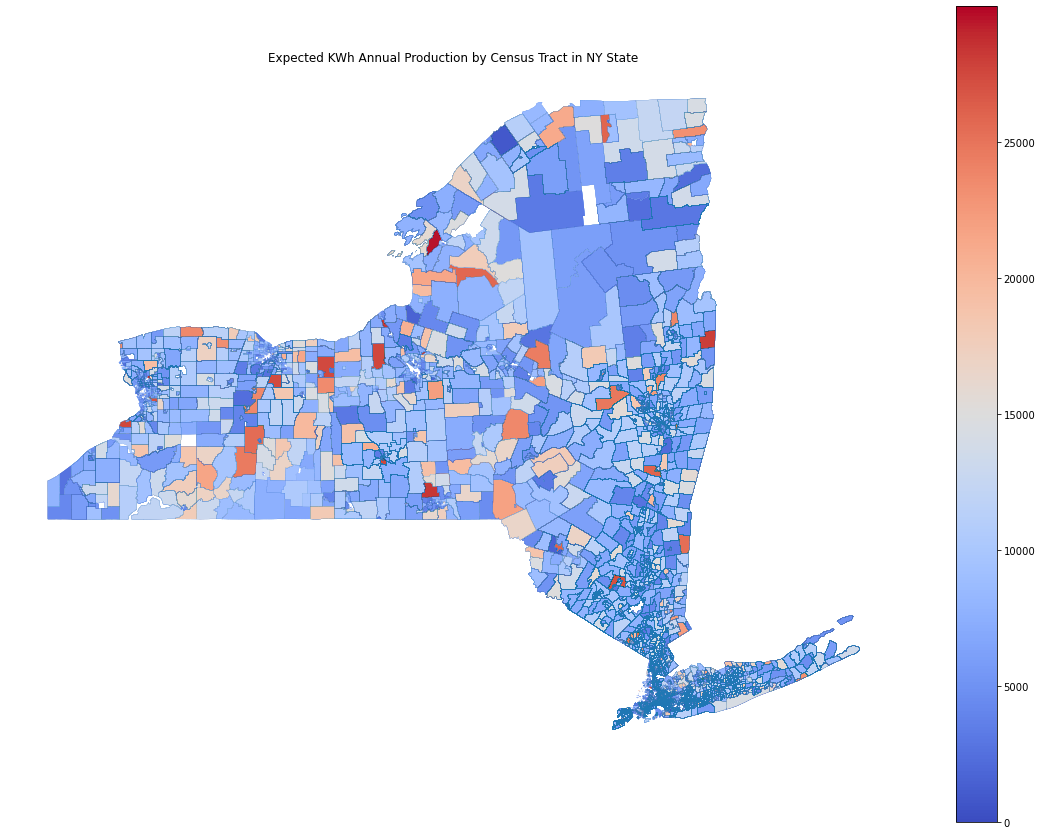

In [38]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot the zip code boundaries
gdf_total.boundary.plot(ax=ax, linewidth=0.01)
ax.set_axis_off() 

# Color the zip code polygons based on average grant values
gdf_total.plot(column='Expected KWh Annual Production', cmap='coolwarm', legend=True ,ax=ax)

# Add a title
plt.title('Expected KWh Annual Production by Census Tract in NY State')

# Show the plot
plt.axis('off')
plt.show()

In [39]:
gdf_nyc = gdf_total[gdf_total['COUNTYFP'].isin(['071', '079','119','087','005','061','047','081','059','103'])]

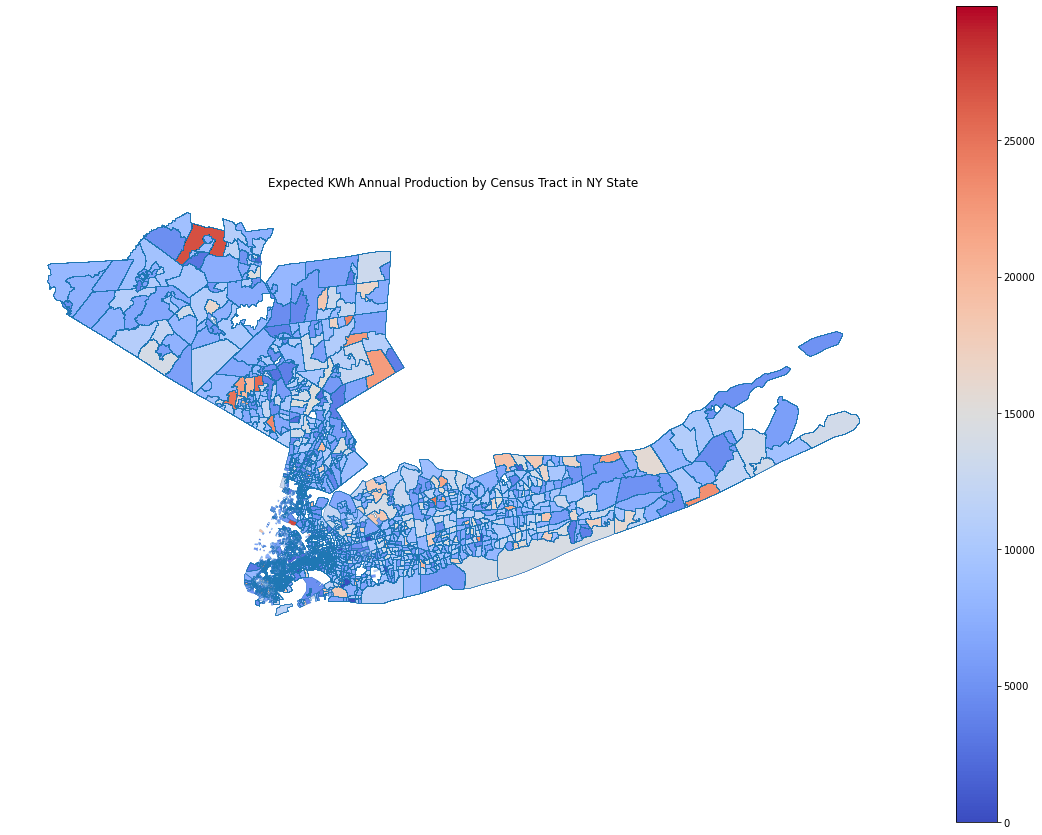

In [40]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot the zip code boundaries
gdf_nyc.boundary.plot(ax=ax, linewidth=0.1)
ax.set_axis_off() 

# Color the zip code polygons based on average grant values
gdf_nyc.plot(column='Expected KWh Annual Production', cmap='coolwarm', legend=True ,ax=ax)

# Add a title
plt.title('Expected KWh Annual Production by Census Tract in NY State')

# Show the plot
plt.axis('off')
plt.show()

In [33]:
gdf_nyc = gdf_total[gdf_total['COUNTYFP'].isin(['005','061','047','081','059'])]

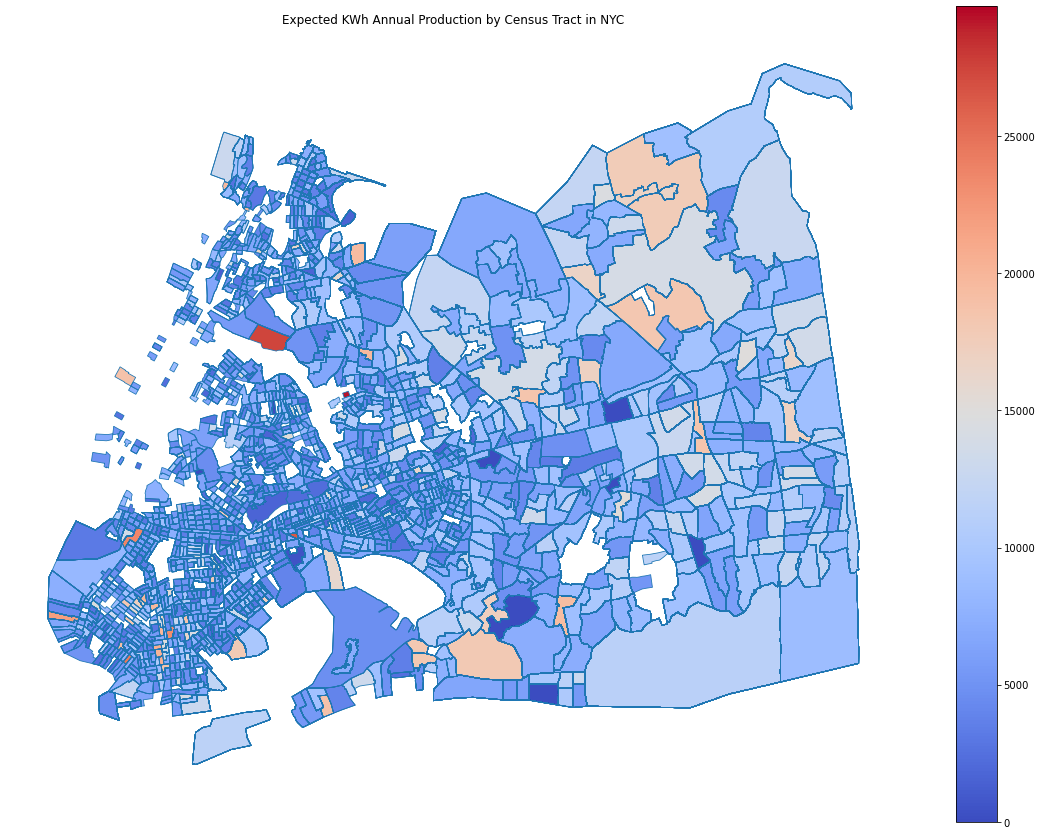

In [35]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Plot the zip code boundaries
gdf_nyc.boundary.plot(ax=ax, linewidth=0.8)
ax.set_axis_off() 

# Color the zip code polygons based on average grant values
gdf_nyc.plot(column='Expected KWh Annual Production', cmap='coolwarm', legend=True ,ax=ax)

# Add a title
plt.title('Expected KWh Annual Production by Census Tract in NYC')

# Show the plot
plt.axis('off')
plt.show()

<ipython-input-77-113d0adf62bc>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = gdf_total.geometry.centroid.x
<ipython-input-77-113d0adf62bc>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = gdf_total.geometry.centroid.y


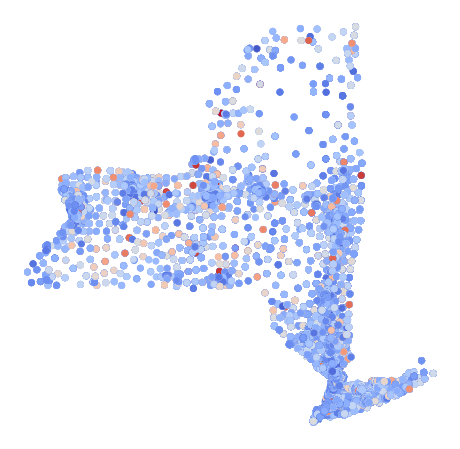

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_axis_off()  # Turn off the axes

# Extract the coordinates of the data points (centroid of each polygon)
x = gdf_total.geometry.centroid.x
y = gdf_total.geometry.centroid.y

# Plot the data as scatter points
ax.scatter(x, y, c=gdf_total['Expected KWh Annual Production'], cmap='coolwarm')

# Display the plot
plt.show()





In [49]:
len(df_sub_fin[df_sub_fin['Expected KWh Annual Production']>30000])/len(df_sub_fin)

0.0019780980173892113

### In the below visuals some census tracts are missing since population and household number values are gotten from the Census API, and some didn't match with out dataset

### Removed some extreme values, most probably errors or outliers

In [85]:
merged_df[merged_df['KWh per capita']>20]

,P1_001N,H1_001N,Census Tract,Expected KWh Annual Production,KWh per capita,KWh per household
111,20,7,36081056100,1701.0,85.05,243.0
2345,4,1,36081064102,2288.0,572.00,2288.0
3102,5,2,36047054300,7433.0,1486.60,3716.5


In [70]:
gdf2 = gdf2[gdf2['KWh per capita']<20]

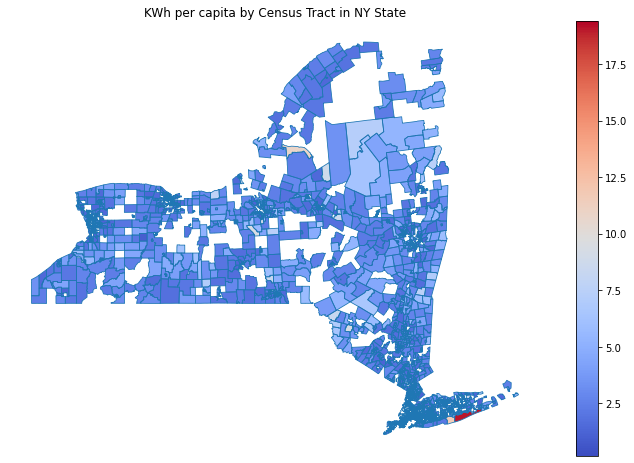

In [71]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the zip code boundaries
gdf2.boundary.plot(ax=ax, linewidth=0.8)

# Color the zip code polygons based on average grant values
gdf2.plot(column='KWh per capita', cmap='coolwarm', legend=True, ax=ax)

# Add a title
plt.title('KWh per capita by Census Tract in NY State')

# Show the plot
plt.axis('off')
plt.show()

### Removed some extreme values, most probably errors or outliers

In [86]:
merged_df[merged_df['KWh per household']>35]

,P1_001N,H1_001N,Census Tract,Expected KWh Annual Production,KWh per capita,KWh per household
111,20,7,36081056100,1701.00,85.050000,243.000000
986,1090,11,36095740300,7355.00,6.747706,668.636364
1874,2780,149,36109000300,6651.75,2.392716,44.642617
1883,3324,98,36109001200,4708.00,1.416366,48.040816
2345,4,1,36081064102,2288.00,572.000000,2288.000000
3044,3772,1,36005000100,27449.00,7.277041,27449.000000
3102,5,2,36047054300,7433.00,1486.600000,3716.500000
3203,883,22,36059982100,6069.00,6.873160,275.863636
3233,364,4,36081042600,7064.00,19.406593,1766.000000
3316,2159,114,36013035902,4896.00,2.267717,42.947368


In [87]:
gdf2 = gdf2[gdf2['KWh per household']<35]

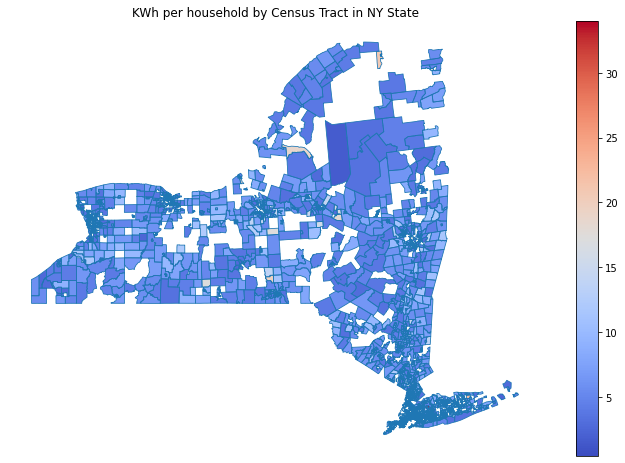

In [88]:
# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the zip code boundaries
gdf2.boundary.plot(ax=ax, linewidth=0.8)

# Color the zip code polygons based on average grant values
gdf2.plot(column='KWh per household', cmap='coolwarm', legend=True, ax=ax)

# Add a title
plt.title('KWh per household by Census Tract in NY State')

# Show the plot
plt.axis('off')
plt.show()

In [99]:
df_income = pd.read_csv('/Users/akarberkin/Downloads/ACSST5Y2021.S1901-Data.csv')


<ipython-input-99-aa1779fd7cfc>:1: DtypeWarning: Columns (2,3,4,5,66,67,68,69,130,131,132,133,194,195,196,197) have mixed types. Specify dtype option on import or set low_memory=False.
  df_income = pd.read_csv('/Users/akarberkin/Downloads/ACSST5Y2021.S1901-Data.csv')


In [100]:
df_income['GEO_ID'] = df_income['GEO_ID'].apply(lambda x: x[-11:])

In [101]:
df_income = df_income[1:]

In [102]:
df_income = df_income[['GEO_ID','S1901_C01_001E','S1901_C01_013E','S1901_C01_012E']]

In [103]:
df_income.rename(columns={'GEO_ID': 'Census Tract', 'S1901_C01_001E' : 'Household number', 'S1901_C01_013E': 'Mean income', 'S1901_C01_012E': 'Median Income'}, inplace = True)

In [104]:
df_income

,Census Tract,Household number,Mean income,Median Income
1,36001000100,825,54061,44871
2,36001000201,1222,73450,42456
3,36001000202,1119,37103,24792
4,36001000301,1141,53193,40666
5,36001000302,1845,71897,42370
...,...,...,...,...
5407,36123150301,887,75295,64917
5408,36123150302,719,70796,52679
5409,36123150400,1229,87152,69945
5410,36123150501,1008,54816,43710


In [105]:
merged_df_income = df_income.merge(df,left_on='Census Tract', right_on='Census Tract')
merged_df_income = merged_df_income.merge(merged_df,left_on='Census Tract', right_on='Census Tract')

In [106]:
merged_df_income

,Census Tract,Household number,Mean income,Median Income,Expected KWh Annual Production_x,P1_001N,H1_001N,Expected KWh Annual Production_y,KWh per capita,KWh per household
0,36001000100,825,54061,44871,3932.380952,2073,939,3932.380952,1.896952,4.187839
1,36001000401,968,99902,75994,8007.416667,2216,1092,8007.416667,3.613455,7.332799
2,36001000403,2271,86593,77835,5756.153846,4418,2338,5756.153846,1.302887,2.461999
3,36001000501,1562,40876,25104,5767.100000,3440,1763,5767.100000,1.676483,3.271185
4,36001000502,941,76759,61354,5848.142857,2841,959,5848.142857,2.058480,6.098168
...,...,...,...,...,...,...,...,...,...,...
3699,36121970800,1122,66808,60000,10970.714286,2764,1435,10970.714286,3.969144,7.645097
3700,36121970900,840,84960,72500,10205.000000,1972,1009,10205.000000,5.174949,10.113974
3701,36121971100,960,69547,56111,11236.733333,2482,1138,11236.733333,4.527290,9.874107
3702,36123150200,1979,64522,49365,12330.909091,5791,2371,12330.909091,2.129323,5.200721


In [115]:
df_median = merged_df_income[merged_df_income["Median Income"] != '-']

In [125]:
df_median.loc[df_median["Median Income"] == '250,000+',"Median Income"] = '260000'

In [128]:
df_median['Median Income'] = df_median['Median Income'].apply(lambda x: int(x))

<ipython-input-128-0def3e5e17a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median['Median Income'] = df_median['Median Income'].apply(lambda x: int(x))


In [129]:
df_median

,Census Tract,Household number,Mean income,Median Income,Expected KWh Annual Production_x,P1_001N,H1_001N,Expected KWh Annual Production_y,KWh per capita,KWh per household
0,36001000100,825,54061,44871,3932.380952,2073,939,3932.380952,1.896952,4.187839
1,36001000401,968,99902,75994,8007.416667,2216,1092,8007.416667,3.613455,7.332799
2,36001000403,2271,86593,77835,5756.153846,4418,2338,5756.153846,1.302887,2.461999
3,36001000501,1562,40876,25104,5767.100000,3440,1763,5767.100000,1.676483,3.271185
4,36001000502,941,76759,61354,5848.142857,2841,959,5848.142857,2.058480,6.098168
...,...,...,...,...,...,...,...,...,...,...
3699,36121970800,1122,66808,60000,10970.714286,2764,1435,10970.714286,3.969144,7.645097
3700,36121970900,840,84960,72500,10205.000000,1972,1009,10205.000000,5.174949,10.113974
3701,36121971100,960,69547,56111,11236.733333,2482,1138,11236.733333,4.527290,9.874107
3702,36123150200,1979,64522,49365,12330.909091,5791,2371,12330.909091,2.129323,5.200721


In [132]:
df_median['Household number'] = df_median['Household number'].apply(lambda x: int(x))

<ipython-input-132-342a4e801b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median['Household number'] = df_median['Household number'].apply(lambda x: int(x))


In [133]:
df_median['kwh per household - non-api'] = df_median['Expected KWh Annual Production_x']/df_median['Household number']

<ipython-input-133-427613a0863a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median['kwh per household - non-api'] = df_median['Expected KWh Annual Production_x']/df_median['Household number']


In [146]:
df_median['log_income'] = df_median['Median Income'].apply(lambda x: np.log(x))

<ipython-input-146-c5b90bc08b12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_median['log_income'] = df_median['Median Income'].apply(lambda x: np.log(x))


In [137]:
df_scatter_median = df_median[['Median Income','log_income','Expected KWh Annual Production_x','KWh per capita', 'KWh per household','kwh per household - non-api']]

In [138]:
df_scatter_median

,Median Income,log_income,Expected KWh Annual Production_x,KWh per capita,KWh per household,kwh per household - non-api
0,44871,10.711547,3932.380952,1.896952,4.187839,4.766522
1,75994,11.238410,8007.416667,3.613455,7.332799,8.272125
2,77835,11.262346,5756.153846,1.302887,2.461999,2.534634
3,25104,10.130782,5767.100000,1.676483,3.271185,3.692125
4,61354,11.024416,5848.142857,2.058480,6.098168,6.214817
...,...,...,...,...,...,...
3699,60000,11.002100,10970.714286,3.969144,7.645097,9.777820
3700,72500,11.191342,10205.000000,5.174949,10.113974,12.148810
3701,56111,10.935087,11236.733333,4.527290,9.874107,11.704931
3702,49365,10.806997,12330.909091,2.129323,5.200721,6.230879


In [142]:
df_scatter_median = df_scatter_median[df_scatter_median['Expected KWh Annual Production_x']<15000]

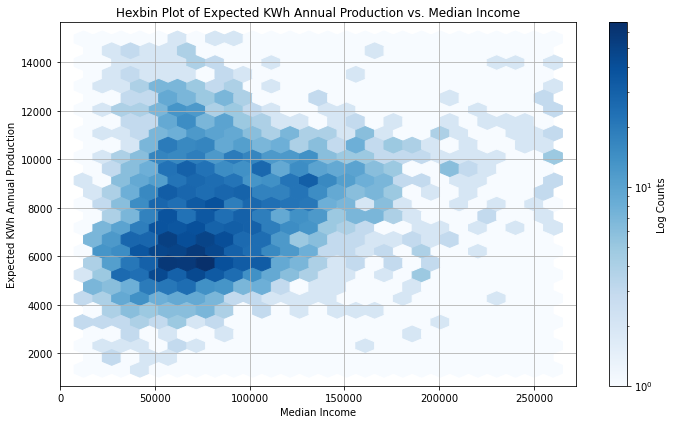

In [143]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_scatter_median['Median Income'], df_scatter_median['Expected KWh Annual Production_x'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('Expected KWh Annual Production')
plt.xlabel('Median Income')
plt.title('Hexbin Plot of Expected KWh Annual Production vs. Median Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

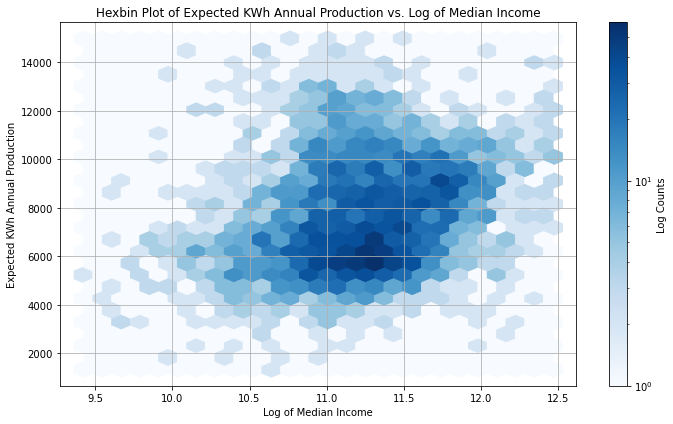

In [144]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_scatter_median['log_income'], df_scatter_median['Expected KWh Annual Production_x'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('Expected KWh Annual Production')
plt.xlabel('Log of Median Income')
plt.title('Hexbin Plot of Expected KWh Annual Production vs. Log of Median Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [147]:
merged_df_income = merged_df_income[merged_df_income["Mean income"] != '-']

In [148]:
merged_df_income = merged_df_income[merged_df_income["Mean income"] != 'N']

In [152]:
merged_df_income['Mean income'] = merged_df_income['Mean income'].apply(lambda x: int(x))

In [153]:
merged_df_income['log_mean_income'] = merged_df_income["Mean income"].apply(lambda x: np.log(x))

In [154]:
merged_df_income

,Census Tract,Household number,Mean income,Median Income,Expected KWh Annual Production_x,P1_001N,H1_001N,Expected KWh Annual Production_y,KWh per capita,KWh per household,log_mean_income
0,36001000100,825,54061,44871,3932.380952,2073,939,3932.380952,1.896952,4.187839,10.897868
1,36001000401,968,99902,75994,8007.416667,2216,1092,8007.416667,3.613455,7.332799,11.511945
2,36001000403,2271,86593,77835,5756.153846,4418,2338,5756.153846,1.302887,2.461999,11.368974
3,36001000501,1562,40876,25104,5767.100000,3440,1763,5767.100000,1.676483,3.271185,10.618298
4,36001000502,941,76759,61354,5848.142857,2841,959,5848.142857,2.058480,6.098168,11.248426
...,...,...,...,...,...,...,...,...,...,...,...
3699,36121970800,1122,66808,60000,10970.714286,2764,1435,10970.714286,3.969144,7.645097,11.109578
3700,36121970900,840,84960,72500,10205.000000,1972,1009,10205.000000,5.174949,10.113974,11.349936
3701,36121971100,960,69547,56111,11236.733333,2482,1138,11236.733333,4.527290,9.874107,11.149758
3702,36123150200,1979,64522,49365,12330.909091,5791,2371,12330.909091,2.129323,5.200721,11.074762


In [155]:
df_hex = merged_df_income[['Mean income','log_mean_income','Expected KWh Annual Production_x','KWh per capita', 'KWh per household']]

In [156]:
df_hex = df_hex[df_hex['Expected KWh Annual Production_x']<15000]

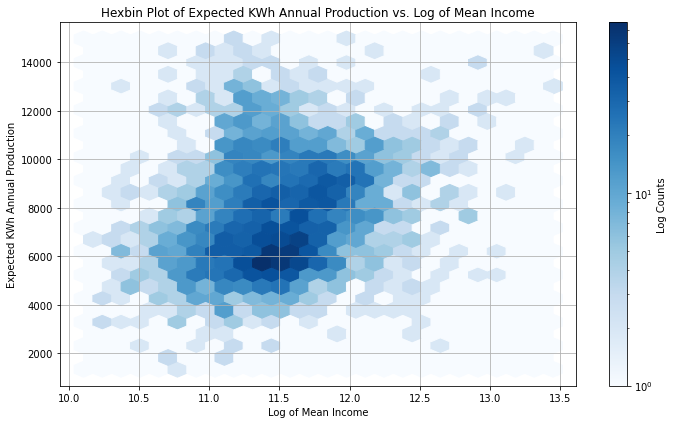

In [158]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_hex['log_mean_income'], df_hex['Expected KWh Annual Production_x'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('Expected KWh Annual Production')
plt.xlabel('Log of Mean Income')
plt.title('Hexbin Plot of Expected KWh Annual Production vs. Log of Mean Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [159]:
df_hex = df_hex[df_hex['Mean income']<150000]

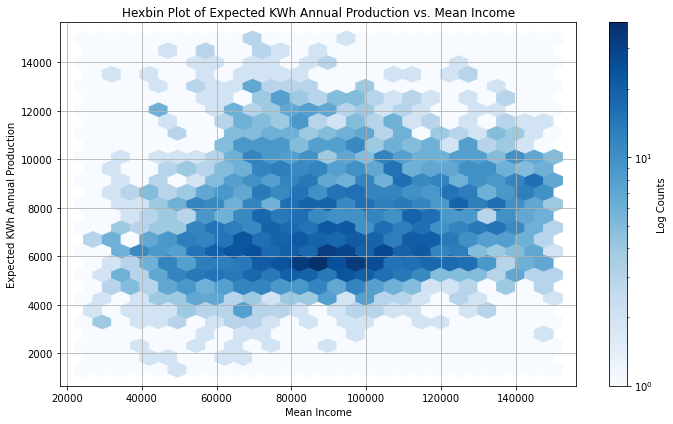

In [160]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_hex['Mean income'], df_hex['Expected KWh Annual Production_x'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('Expected KWh Annual Production')
plt.xlabel('Mean Income')
plt.title('Hexbin Plot of Expected KWh Annual Production vs. Mean Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

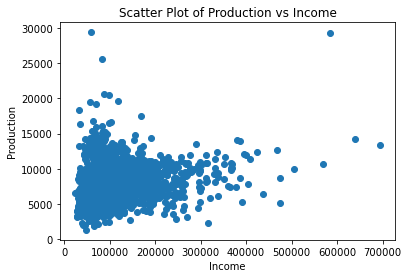

In [81]:
plt.scatter(df_hex['Mean income'],df_hex['Expected KWh Annual Production_x'])

# Add labels and a title
plt.xlabel('Income')
plt.ylabel('Production')
plt.title('Scatter Plot of Production vs Income')

# Display the plot
plt.show()

In [41]:
merged_df_income = merged_df_income[merged_df_income['KWh per capita']<20]

In [84]:
df_hex = df_hex[df_hex['KWh per capita']<7.5]

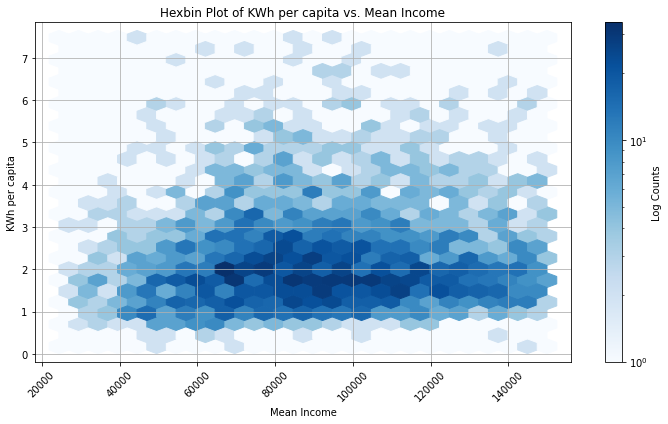

In [85]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_hex['Mean income'],df_hex['KWh per capita'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('KWh per capita')
plt.xlabel('Mean Income')
plt.title('Hexbin Plot of KWh per capita vs. Mean Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [46]:
merged_df_income = merged_df_income[merged_df_income['KWh per household']<35]

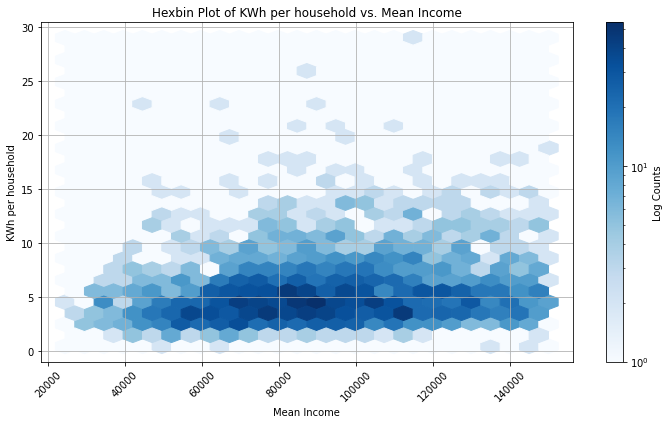

In [86]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_hex['Mean income'],df_hex['KWh per household'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('KWh per household')
plt.xlabel('Mean Income')
plt.title('Hexbin Plot of KWh per household vs. Mean Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [164]:
df_sub_count = df_sub_fin.groupby(['Census Tract']).count()

In [168]:
df_sub_count = df_sub_count.rename(columns = {'Expected KWh Annual Production': 'count'})

In [180]:
df_sub_count.index = df_sub_count.index.astype(int)
df_sub_count.index = df_sub_count.index.astype(str)

In [182]:
df_project_count = merged_df_income.merge(df_sub_count,left_on='Census Tract', right_on='Census Tract')

In [183]:
df_project_count

,Census Tract,Household number,Mean income,Median Income,Expected KWh Annual Production_x,P1_001N,H1_001N,Expected KWh Annual Production_y,KWh per capita,KWh per household,log_mean_income,count
0,36001000100,825,54061,44871,3932.380952,2073,939,3932.380952,1.896952,4.187839,10.897868,21
1,36001000401,968,99902,75994,8007.416667,2216,1092,8007.416667,3.613455,7.332799,11.511945,12
2,36001000403,2271,86593,77835,5756.153846,4418,2338,5756.153846,1.302887,2.461999,11.368974,52
3,36001000501,1562,40876,25104,5767.100000,3440,1763,5767.100000,1.676483,3.271185,10.618298,10
4,36001000502,941,76759,61354,5848.142857,2841,959,5848.142857,2.058480,6.098168,11.248426,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3691,36121970800,1122,66808,60000,10970.714286,2764,1435,10970.714286,3.969144,7.645097,11.109578,14
3692,36121970900,840,84960,72500,10205.000000,1972,1009,10205.000000,5.174949,10.113974,11.349936,6
3693,36121971100,960,69547,56111,11236.733333,2482,1138,11236.733333,4.527290,9.874107,11.149758,15
3694,36123150200,1979,64522,49365,12330.909091,5791,2371,12330.909091,2.129323,5.200721,11.074762,11


In [184]:
df_project_count = df_project_count[['Mean income','Median Income','log_mean_income', 'count' ]]

In [192]:
df_project_count = df_project_count[df_project_count['count']<150]

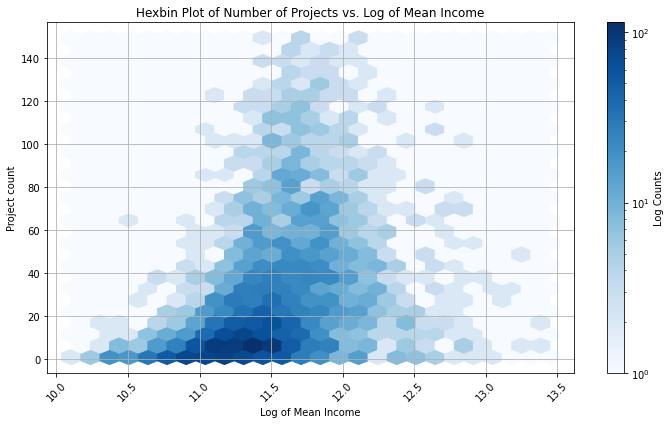

In [194]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_project_count['log_mean_income'],df_project_count['count'], gridsize=25, cmap='Blues', bins='log')
plt.ylabel('Project count')
plt.xlabel('Log of Mean Income')
plt.title('Hexbin Plot of Number of Projects vs. Log of Mean Income')
plt.colorbar(label='Log Counts')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [195]:
X = df_scatter_median['Median Income']
y = df_scatter_median['Expected KWh Annual Production_x']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Expected KWh Annual Production_x   R-squared:                       0.061
Model:                                          OLS   Adj. R-squared:                  0.061
Method:                               Least Squares   F-statistic:                     237.3
Date:                              Mon, 16 Oct 2023   Prob (F-statistic):           6.19e-52
Time:                                      15:09:39   Log-Likelihood:                -33092.
No. Observations:                              3655   AIC:                         6.619e+04
Df Residuals:                                  3653   BIC:                         6.620e+04
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6494.0447     82.282     78.924      0.000    6332.722    6655.368
Median Income     0.0137      0.001     15.406      0.000       0.012       0.015
==============================================================================
Omnibus:                      229.515   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.254
Skew:                           0.630   Prob(JB):                     1.03e-60
Kurtosis:                       3.475   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
X = df_scatter_median['log_income']
y = df_scatter_median['Expected KWh Annual Production_x']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Expected KWh Annual Production_x   R-squared:                       0.060
Model:                                          OLS   Adj. R-squared:                  0.060
Method:                               Least Squares   F-statistic:                     232.9
Date:                              Mon, 16 Oct 2023   Prob (F-statistic):           5.08e-51
Time:                                      15:10:01   Log-Likelihood:                -33094.
No. Observations:                              3655   AIC:                         6.619e+04
Df Residuals:                                  3653   BIC:                         6.621e+04
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5379.6815    854.286     -6.297      0.000   -7054.607   -3704.756
log_income  1158.4793     75.913     15.261      0.000    1009.643    1307.316
==============================================================================
Omnibus:                      232.122   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.521
Skew:                           0.636   Prob(JB):                     2.01e-61
Kurtosis:                       3.466   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
X = df_project_count['log_mean_income']
y = df_project_count['count']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     563.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          7.47e-116
Time:                        15:10:37   Log-Likelihood:                -17220.
No. Observations:                3637   AIC:                         3.444e+04
Df Residuals:                    3635   BIC:                         3.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -266.3637     12.399    -21.483      0.000    -290.672    -242.055
log_mean_income    25.5832      1.078     23.730      0.000      23.470      27.697
==============================================================================
Omnibus:                      974.036   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2349.580
Skew:                           1.478   Prob(JB):                         0.00
Kurtosis:                       5.601   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""